In [20]:
# Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from scipy.interpolate import RectBivariateSpline
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
rcParams.update({'font.size': 18})


# An example of Gradient Descent

$f (x, y) = x^2 + 3y^2$

Gradient of $f$ :
$\nabla f  = 2x\hat{x} + 6y\hat{y}$

In [ ]:
h = 0.5
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
# Return coordinate matrices from coordinate vectors.
X,Y = np.meshgrid(x,y)
def func1(x,y):
    return np.power(x,2) + 3*np.power(y,2)

Fquad = func1(X,Y)

$\delta = \frac{x^2 + 9y^2}{2x^2 + 54y^2}$

In [ ]:
guess_point = [3,2]

def del_func1(xk,yk):
    return (xk**2 + 9*yk**2)/(2*xk**2 + 54*yk**2)

In [34]:
# gd path
gds = []
i = 0
gd = dict(zip(('x','y'),guess_point))
while i < 10:
    if i > 0:
        gd['x']-= 2*gd['del']*gd['x']
        gd['y']-= 6*gd['del']*gd['y']

    gd['f'] = func1(gd['x'],gd['y'])

    gd['del'] = del_func1(gd['x'],gd['y'])
    gds.append(gd.copy())
    #Check convergence
    if i>1 and np.abs(gds[i]['f']-gds[i-1]['f']) < 10**(-3):
            break
    i+=1
gds = pd.DataFrame.from_dict(gds)
gds.round(3)

,x,y,f,del
0,3.000,2.000,21.000,0.192
1,1.846,-0.308,3.692,0.357
2,0.527,0.352,0.649,0.192
3,0.325,-0.054,0.114,0.357
4,0.093,0.062,0.020,0.192
5,0.057,-0.010,0.004,0.357
6,0.016,0.011,0.001,0.192
7,0.010,-0.002,0.000,0.357


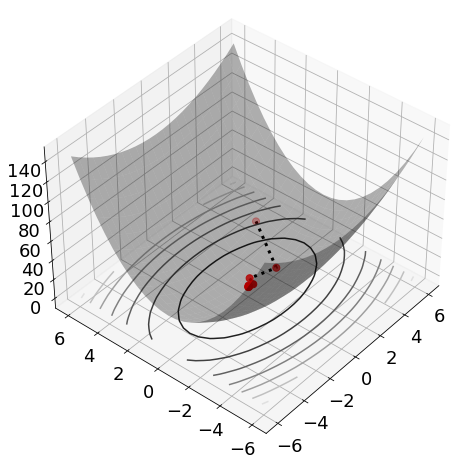

In [36]:
def gd_viz(gd_path,mat_x,mat_y, func):
    fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'},figsize=(16,8) )
    # Plot the surface and contour of the function f(x,y)
    ax.plot_surface(mat_x, mat_y, func,linewidth=0,color='k',alpha=0.3)
    ax.contour(mat_x, mat_y, func, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
    # Descent path
    ax.scatter(gd_path.x,gd_path.y,gd_path.f,'o',color='r',s=50) # Dots
    ax.plot(gd_path.x,gd_path.y,gd_path.f,':',color='k',linewidth=3) # Lines

    ax.view_init(elev=40, azim=-140) # viewing angle
    plt.show()
gd_viz(gds,X,Y,Fquad)

## Computing the gradient descent with fmin

In [37]:
# Bivariate spline approximation over a rectangular mesh.
# Can be used for both smoothing and interpolating data.

dFy,dFx = np.gradient(Fquad,h,h)
F_interp = RectBivariateSpline(x,y,Fquad)
dFx_interp = RectBivariateSpline(x,y,dFx)
dFy_interp = RectBivariateSpline(x,y,dFy)

def del_search(delt,t):
    datax,datay,dfx,dfy = t
    return F_interp(datax-delt*dfx,datay-delt*dfy)

# gd path
guess_point = [3,2]
gds = []
i = 0
gd = dict(zip(('x','y'),guess_point))
while i < 10:
    if i > 0:
        gd['x']-= gd['del']*gd['dfx']
        gd['y']-= gd['del']*gd['dfy']

    gd['dfx'] = dFx_interp(gd['x'],gd['y'])[0][0]
    gd['dfy'] = dFy_interp(gd['x'],gd['y'])[0][0]
    gd['f'] = F_interp(gd['x'],gd['y'])[0][0]

    t = (gd['x'], gd['y'], gd['dfx'], gd['dfy'])
    gd['del'] = scipy.optimize.fmin(del_search,0.2,args=(t,),disp=False)[0]
    gds.append(gd.copy())
    i+=1
gds = pd.DataFrame.from_dict(gds)
gds.round(3)

,x,y,dfx,dfy,f,del
0,3.000,2.000,4.000,18.000,31.000,0.194
1,2.226,-1.483,-2.967,13.356,17.065,-0.194
2,1.652,1.101,2.202,9.911,9.399,0.194
3,1.226,-0.817,-1.633,7.354,5.174,-0.194
4,0.910,0.606,1.213,5.457,2.850,0.194
5,0.675,-0.450,-0.899,4.049,1.569,-0.194
6,0.501,0.334,0.668,3.005,0.864,0.194
7,0.372,-0.248,-0.495,2.230,0.476,-0.194
8,0.276,0.184,0.368,1.655,0.262,0.194
9,0.205,-0.136,-0.273,1.228,0.144,-0.194


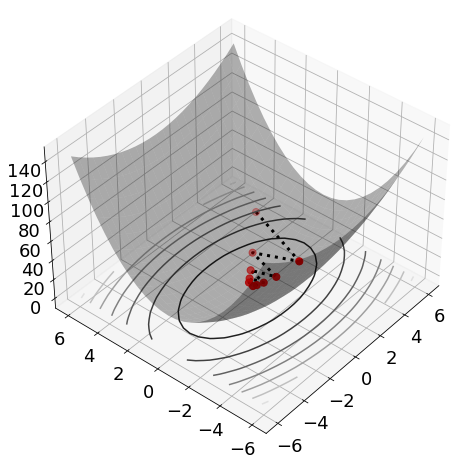

In [38]:
gd_viz(gds,X,Y,Fquad)

     x    y  dfx   dfy     f  delta
0  3.0  2.0  4.0  18.0  31.0    0.0
1  0.0  0.0  0.0   0.0   0.0    0.0
2  0.0  0.0  0.0   0.0   0.0    0.0
     x    y  dfx   dfy     f     delta
0  3.0  2.0  4.0  18.0  31.0  0.193516
1  0.0  0.0  0.0   0.0   0.0  0.000000
2  0.0  0.0  0.0   0.0   0.0  0.000000
3  0.0  0.0  0.0   0.0   0.0  0.000000
4  0.0  0.0  0.0   0.0   0.0  0.000000
5  0.0  0.0  0.0   0.0   0.0  0.000000
6  0.0  0.0  0.0   0.0   0.0  0.000000
7  0.0  0.0  0.0   0.0   0.0  0.000000
8  0.0  0.0  0.0   0.0   0.0  0.000000
9  0.0  0.0  0.0   0.0   0.0  0.000000
          x         y   dfx   dfy      f     delta
0  3.000000  2.000000   4.0  18.0   31.0  0.193516
1  2.419453  1.612969 -11.0 -33.0  121.0 -0.091641
2  0.000000  0.000000   0.0   0.0    0.0  0.000000
3  0.000000  0.000000   0.0   0.0    0.0  0.000000
4  0.000000  0.000000   0.0   0.0    0.0  0.000000
5  0.000000  0.000000   0.0   0.0    0.0  0.000000
6  0.000000  0.000000   0.0   0.0    0.0  0.000000
7  0.000000  0.0000

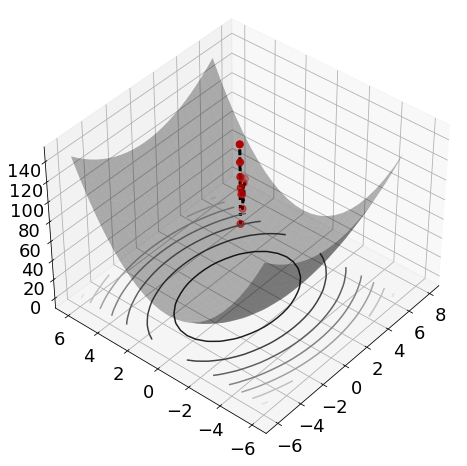

     x    y  dfx   dfy     f  delta
0  3.0  2.0  4.0  18.0  31.0    0.0
1  0.0  0.0  0.0   0.0   0.0    0.0
2  0.0  0.0  0.0   0.0   0.0    0.0


IndexError: iloc cannot enlarge its target object

In [56]:
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

dFy,dFx = np.gradient(F,h,h)
print(x)
F_interp = RectBivariateSpline(x,y,F)
dFx_interp = RectBivariateSpline(x,y,dFx)
dFy_interp = RectBivariateSpline(x,y,dFy)


x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

def delsearch(Del,t):
    x,y,dfx,dfy,X,Y,F = t
    x0 = x-Del*dfx
    y0 = y-Del*dfy
    return F_interp(x0,y0)


for jj in range(3):
    x = np.zeros(10)
    y = np.zeros(10)
    f = np.zeros(10)
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0],y[0])
    dfx = dFx_interp(x[0],y[0])
    dfy = dFy_interp(x[0],y[0])
    for j in range(len(x)-1):
        t = x[j],y[j],dfx,dfy,X,Y,F
        Del = scipy.optimize.fmin(delsearch,0.2,args=(t,),disp=False);
        x[j+1] = x[j]-Del*dfx # Update x, y, and f
        y[j+1] = y[j]-Del*dfy
        f[j+1] = F_interp(x[j+1],y[j+1])
        dfx = dFx_interp(x[j+1],y[j+1])
        dfy = dFy_interp(x[j+1],y[j+1])

        if np.abs(f[j+1]-f[j]) < 10**(-6):
            x = x[:j+2]
            y = y[:j+2]
            f = f[:j+2]
            break

    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f

[-6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00
 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00
 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
 -2.13162821e-14  1.00000

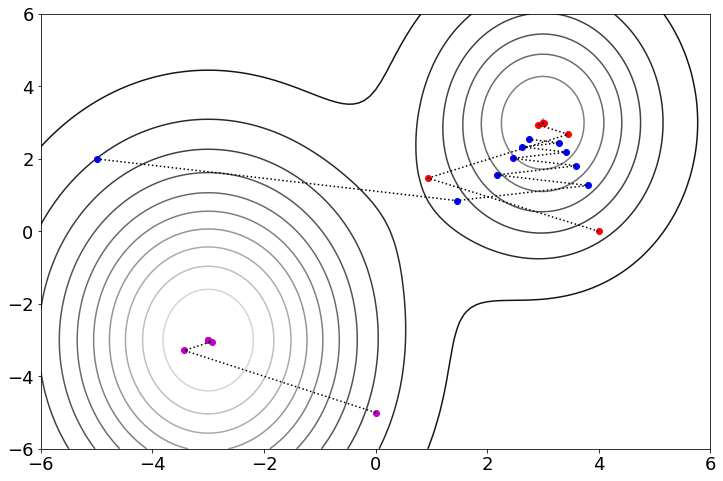

In [57]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

<ipython-input-58-c0fc606ff8b7>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x1,y1,f1,'o',color='r',MarkerSize=10)
<ipython-input-58-c0fc606ff8b7>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x2,y2,f2,'o',color='m',MarkerSize=10)
<ipython-input-58-c0fc606ff8b7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x3,y3,f3,'o',color='b',MarkerSize=10)


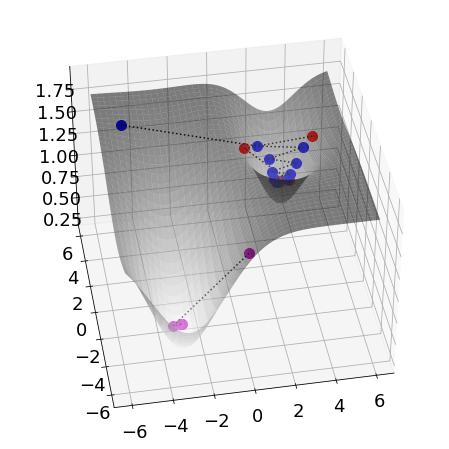

In [58]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',MarkerSize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',MarkerSize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',MarkerSize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

# Alternating Descent

In [ ]:
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)

x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0],ya[0])

    fx = F_interp(xa[0],y)
    xa[1]=xa[0]
    ya[1]=y[np.argmin(fx)]

    fy = F_interp(x,ya[1])
    ya[2]=ya[1]
    xa[2]=x[np.argmin(fy)]

    fx = F_interp(xa[2],y)
    xa[3]=xa[2]
    ya[3]=y[np.argmin(fx)]

    fy = F_interp(x,ya[3])
    ya[4]=ya[3]
    xa[4]=x[np.argmin(fy)]

    for j in range(1,5):
        f[j] = F_interp(xa[j],ya[j])

    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f

In [ ]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',MarkerSize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',MarkerSize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',MarkerSize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()